# Example for evaluating a trained model on BP environment

In [1]:
import gym
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from bongard_base_env import BPEnv
from stable_baselines3 import PPO, A2C, DQN
from eval_model import eval_model, plot_bp_ranking, plot_feature_space, dict_to_runname

/Users/salahedineyoussef/miniconda3/envs/bongard/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
algo_dict = {'PPO': PPO, 'A2C': A2C}
env_dict = {'BPEnv': BPEnv}

params = {

    'env': 'BPEnv',
    'algo': 'PPO',
    'policy': 'SiaMlpPolicy',
    'lr': 7e-05,
    'eplength': False,
    'CB': False,
    'clip_range': 0.2,
    'save_model': False,
    'run_name' : 'BPEnv2_PPO_SiaMlpPolicy_lr1e-05_clip_range0.2_27',
    'seeds':  [11, 61, 331],
    'lrs': [1e-05, 3e-05, 4e-05, 5e-05, 7e-05, 9e-05],
    'clip_ranges': [0.2, 0.1, 0.05, 0.4],
    'log_dir': 'logs/',
    'total_timesteps': 2000000,
    'skip_action' : True,
    'test_mode': False,
    'bp_ranking' : True,
    'bp_feature_space' : True,
    'render' : False,
    
}

## Initialize Environment
In the case of BP environments we have the option of including the skip action or leaving it out which can be specified in the hyperparameters.

In [3]:
env = env_dict[params['env']](skip_action=params['skip_action'])

## Evaluate a trained model
We can now evaluate a model by specifying the name of the run we have previously used to train the model. For evaluation there are three main modes:

- Look at the top 9 BPs with the best performance
    - This can be achieved by setting ```bp_ranking``` to ```True```
- Look at the learned feature space for the best 9 BP
    - This can be achieved by setting ```bp_ranking``` to ```True```
- Render the solving of BPs and look at actions in which the agent decides to skip
    - For this ```render``` has to be set to ```True```
    

In [4]:
torch.manual_seed(5)
np.random.seed(5)
random.seed(5)

params['run_name'] = "BPEnv2_PPO_SiaMlpPolicy_lr1e-05_clip_range0.2_27"

algo = algo_dict[params['algo']](params['policy'], env, learning_rate=params['lr'], clip_range=params['clip_range'], verbose=1, causal=params['CB'], tensorboard_log=f"./{params['log_dir']}/{params['run_name']}/")
model = algo.load('models/' + params['run_name'])
env, info_dict = eval_model(model, env, feature_space='diff', n_eps=50, render=False)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Plot the best 9 BPs with best performance

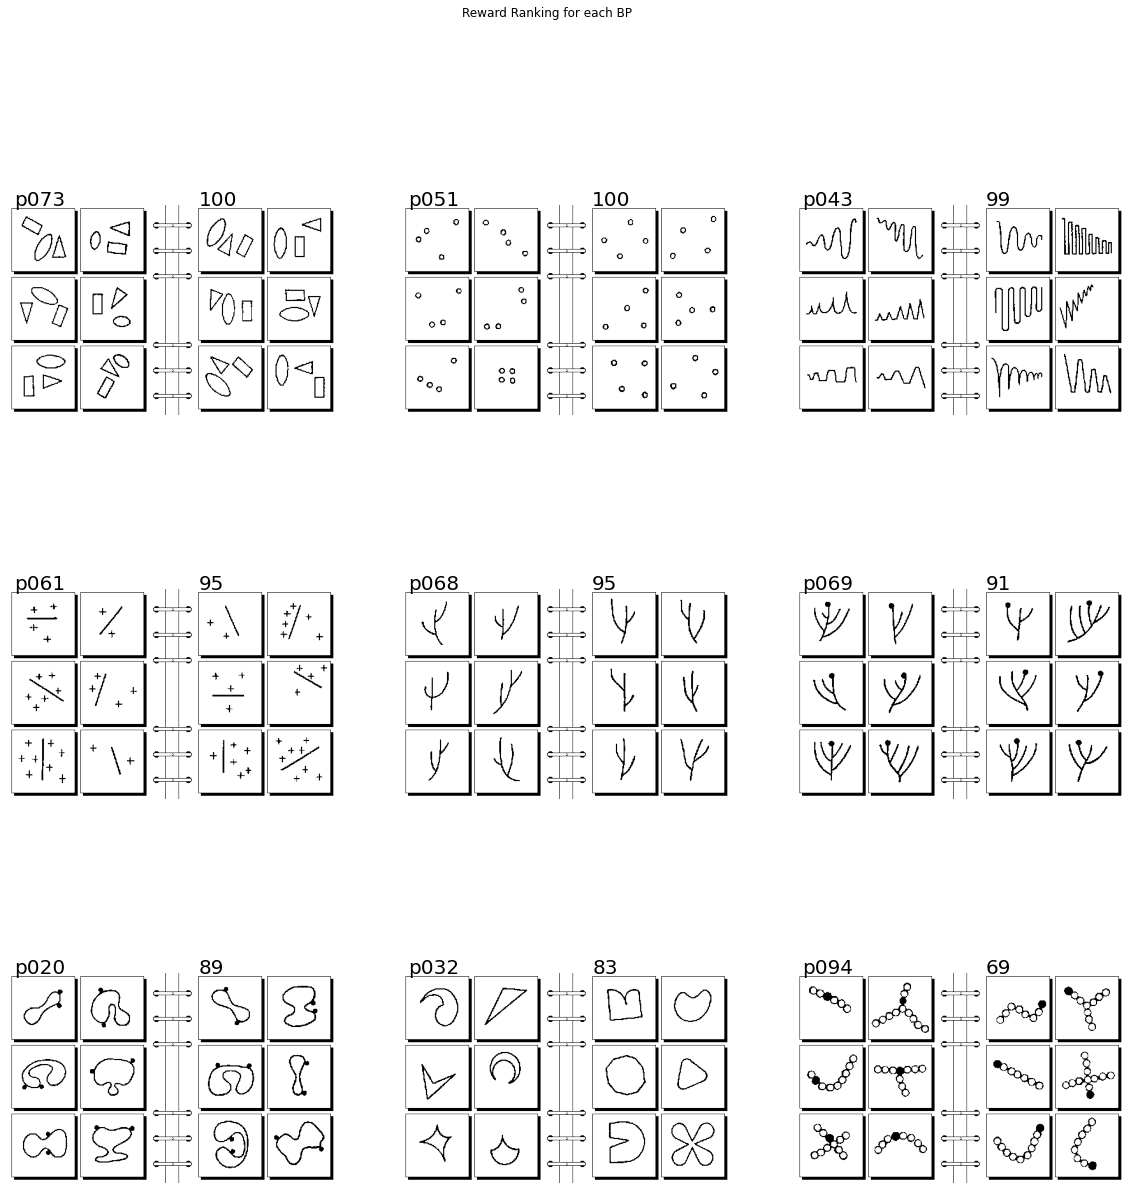

In [5]:
plt.rcParams['figure.figsize'] = [20, 20]
if params['bp_ranking']:
    plot_bp_ranking(env)

## Plot the feature space of the BP image comparisons

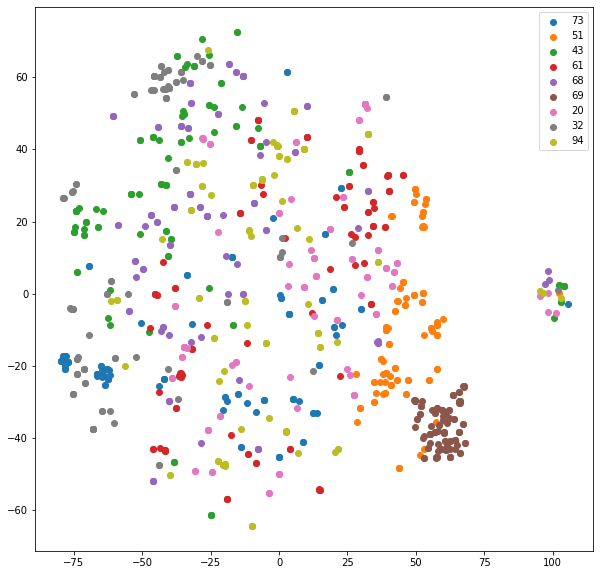

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

if params['bp_feature_space']:
    plot_feature_space(env, info_dict)